In [1]:
#Se quiere importar un archivo pickle con un diccionario y transformarlo en un dataframe de pandas

import pandas as pd
import pickle
import re
#Se importa el archivo pickle
with open('scrap_info_alq.pkl', 'rb') as f:
    diccionario = pickle.load(f)


with open('scrap_info.pkl', 'rb') as f:
    diccionario2 = pickle.load(f)
#Se transforma el diccionario en un dataframe
df = pd.DataFrame(diccionario)
df2 = pd.DataFrame(diccionario2)
#Ahora se cambia las filas por las columnas
df = df.T
df2 = df2.T
df.head()
df2.head()

#Ahora unimos los dos dataframes
df_def = pd.concat([df,df2])
#Limpiamos la columna de precio quitando el simbolo de € y quitando el /mes

df_def['Precio'] = df_def['Precio'].str.replace('€','')
df_def['Precio'] = df_def['Precio'].str.replace('/mes','')

#transformamos el el precio a numerico	
df_def['Precio'] = df_def['Precio'].str.replace('.','')

#Eliminamos la fila que Precio que pone por consultar
df_def = df_def[df_def['Precio'] != 'precio a consultar']

#Transformamos la columna de precio a numerico
df_def['Precio'] = pd.to_numeric(df_def['Precio'])

#vemos el tipo de datos de cada columna
df_def.dtypes

Precio                    int64
Descripcion              object
Otras_caractericas       object
Caracteristicas          object
Eficiencia_energetica    object
dtype: object

Tras llamar al dataset y limpiar la columna del precio se va intentar construir un dataframe con columnas de m^2 número de habitaciones, baños etc.

In [2]:
import numpy as np
# Lista para almacenar los resultados
resultados = []

for i in range(len(df_def)):
    # Obtén la información sobre las habitaciones de la fila actual
    habitaciones_info = df_def["Caracteristicas"][i].get("habitaciones")
    
    # Verificar si habitaciones_info no es None
    if habitaciones_info:
        # Buscar el número que acompaña a la palabra "dormitorio"
        dormitorios_numero = re.search(r'(\d+) dormitorios', habitaciones_info)
        if dormitorios_numero:
            dormitorios = dormitorios_numero.group(1)
        else:
            dormitorios = None
    else:
        dormitorios = None
    
    # Agregar el resultado a la lista
    resultados.append(dormitorios)

# Calcular la media de los valores existentes en la lista resultados
media_habitaciones = np.mean([int(x) for x in resultados if x is not None])
media_habitaciones_entero = int(round(media_habitaciones))
# Reemplazar los valores None con la media calculada
resultados_imputados = [media_habitaciones_entero if x is None else x for x in resultados]

# Agregar la lista imputada como una nueva columna al DataFrame
df_def['Habitaciones'] = resultados_imputados


# Mostrar el DataFrame con la nueva columna
print(df_def["Habitaciones"])

https://www.indomio.es/anuncios/95227781/    3
https://www.indomio.es/anuncios/95146207/    4
https://www.indomio.es/anuncios/94613177/    2
https://www.indomio.es/anuncios/94500757/    2
https://www.indomio.es/anuncios/95223135/    3
                                            ..
https://www.indomio.es/anuncios/95007509/    3
https://www.indomio.es/anuncios/94958481/    2
https://www.indomio.es/anuncios/95006805/    2
https://www.indomio.es/anuncios/95313313/    3
https://www.indomio.es/anuncios/95319871/    2
Name: Habitaciones, Length: 1558, dtype: object


C:\Users\alexn\AppData\Local\Temp\ipykernel_13080\1683633849.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  habitaciones_info = df_def["Caracteristicas"][i].get("habitaciones")


In [3]:
resultados = []

for i in range(len(df_def)):
    # Obtén la información sobre los baños de la fila actual
    habitaciones_info = df_def["Caracteristicas"][i].get("habitaciones")
    
    # Verificar si habitaciones_info no es None
    if habitaciones_info:
        # Buscar el número que acompaña a la palabra "baño(s)"
        banos_numero = re.search(r'(\d+) baño[s]?', habitaciones_info)
        if banos_numero:
            banos = banos_numero.group(1)
        else:
            banos = None
    else:
        banos = None
    
    # Agregar el resultado a la lista
    resultados.append(banos)
media_banos = np.mean([int(x) for x in resultados if x is not None])
media_banos_entero = int(round(media_banos))
# Reemplazar los valores None con la media calculada
resultados_imputados = [media_banos_entero if x is None else x for x in resultados]

# Agregar la lista imputada como una nueva columna al DataFrame
df_def['Baños'] = resultados_imputados
print(df_def["Baños"])


https://www.indomio.es/anuncios/95227781/    1
https://www.indomio.es/anuncios/95146207/    1
https://www.indomio.es/anuncios/94613177/    1
https://www.indomio.es/anuncios/94500757/    2
https://www.indomio.es/anuncios/95223135/    1
                                            ..
https://www.indomio.es/anuncios/95007509/    1
https://www.indomio.es/anuncios/94958481/    2
https://www.indomio.es/anuncios/95006805/    2
https://www.indomio.es/anuncios/95313313/    1
https://www.indomio.es/anuncios/95319871/    1
Name: Baños, Length: 1558, dtype: object


C:\Users\alexn\AppData\Local\Temp\ipykernel_13080\3262558553.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  habitaciones_info = df_def["Caracteristicas"][i].get("habitaciones")


In [4]:
metros_cuadrados_lista = []
for i in range(len(df_def)):
    # Convertir la entrada de la columna "Descripcion" a cadena de texto
    texto = str(df_def["Descripcion"][i])
    
    # Buscar los metros cuadrados usando una expresión regular
    metros_cuadrados_match = re.search(r'(\d+(?:\.\d+)?)\s*(?:m²|m2|metros\s+cuadrados|metros)', texto)
    
    # Verificar si se encontró la información de los metros cuadrados
    if metros_cuadrados_match:
        metros_cuadrados = float(metros_cuadrados_match.group(1))  # Convertir a float en lugar de int
    else:
        metros_cuadrados = None
    
    # Agregar el resultado a la lista
    metros_cuadrados_lista.append(metros_cuadrados)

media_m2 = np.mean([int(x) for x in metros_cuadrados_lista if x is not None])
media_m2_entero = int(round(media_m2))
# Reemplazar los valores None con la media calculada
resultados_imputados = [media_m2_entero if x is None else x for x in metros_cuadrados_lista]

# Agregar la lista imputada como una nueva columna al DataFrame
df_def['Metros Cuadrados'] = resultados_imputados

C:\Users\alexn\AppData\Local\Temp\ipykernel_13080\3092225319.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texto = str(df_def["Descripcion"][i])


In [5]:
# Se crea una lista para almacenar los resultados
resultados = []
for i in range(len(df_def)):
    contrato = df_def["Caracteristicas"][i].get("contrato")
    
    if contrato:
        contrato = contrato.lower()
    else:
        contrato = None
    
    resultados.append(contrato)

df_def["Contrato"] = resultados

C:\Users\alexn\AppData\Local\Temp\ipykernel_13080\3247945094.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  contrato = df_def["Caracteristicas"][i].get("contrato")


In [6]:
#Se cambia el tipo de datos de las columnas habitaciones, baños a numerico y el de contrato a stirng

df_def["Habitaciones"] = pd.to_numeric(df_def["Habitaciones"])
df_def["Baños"] = pd.to_numeric(df_def["Baños"])
df_def["Contrato"] = df_def["Contrato"].astype(str)


df_def.dtypes

Precio                     int64
Descripcion               object
Otras_caractericas        object
Caracteristicas           object
Eficiencia_energetica     object
Habitaciones               int64
Baños                      int64
Metros Cuadrados         float64
Contrato                  object
dtype: object

In [7]:
import spacy
import re
import unicodedata
import string

# Cargar el modelo de spaCy para el idioma español
nlp = spacy.load("es_core_news_sm")

def remove_accents(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def remove_special_characters(text):
    pat = '[{}]'.format(re.escape(string.punctuation))
    return re.sub(pat, '', text)

def preprocess_text(text):
    if text is None:
        return ''
    # Convertir texto a minúsculas
    text = text.lower()
    # Eliminar acentos
    text = remove_accents(text)
    # Eliminar caracteres especiales y números
    text = remove_special_characters(text)
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    # Eliminar stopwords (opcional)
    tokens = [word for word in tokens if not nlp.vocab[word].is_stop]
    return ' '.join(tokens)

# Aplicar la función de preprocesado a la columna 'Descripcion'
df_def['Descripcion'] = df_def['Descripcion'].apply(preprocess_text)

print(df_def['Descripcion'])

https://www.indomio.es/anuncios/95227781/    alquilar piso amueblado 3 habitación carrer de...
https://www.indomio.es/anuncios/95146207/    piso estudiantes entrar 1ro febrero 30 junio p...
https://www.indomio.es/anuncios/94613177/    disponible alquiler mensual anual 2 dormitorio...
https://www.indomio.es/anuncios/94500757/    disponible alquiler mensual anual 2 dormitorio...
https://www.indomio.es/anuncios/95223135/      rincon acogedor   necesitar espacio   gustar...
                                                                   ...                        
https://www.indomio.es/anuncios/95007509/    atico 95 m2 valencia valencia solidinmuebl ven...
https://www.indomio.es/anuncios/94958481/    vender piso obra camino moncada tratar residen...
https://www.indomio.es/anuncios/95006805/    vender exclusiva 6 vivienda obra calle arquite...
https://www.indomio.es/anuncios/95313313/    vender piso barrio tormoseste luminoso apartam...
https://www.indomio.es/anuncios/95319871/    piso 

In [9]:
# Seleccionar las columnas relevantes
columns = ['Descripcion', 'Precio', 'Habitaciones', 'Baños', 'Metros Cuadrados', 'Contrato']
df_filtered = df_def[columns]

min_bedrooms = 2
max_price = 1500
min_bathrooms = 1
min_sqft = 120
contrato = "alquiler"

# List to keep track of applied filters
applied_filters = []

# Filtrar el DataFrame por habitaciones
if min_bedrooms is not None and len(df_filtered[df_filtered['Habitaciones'] >= min_bedrooms]) >= 5:
    df_filtered = df_filtered[df_filtered['Habitaciones'] >= min_bedrooms]
    applied_filters.append('Habitaciones')

# Filtrar el DataFrame por precio
if max_price is not None and len(df_filtered[df_filtered['Precio'] <= max_price]) >= 5:
    df_filtered = df_filtered[df_filtered['Precio'] <= max_price]
    applied_filters.append('Precio')

# Filtrar el DataFrame por baño
if min_bathrooms is not None and len(df_filtered[df_filtered['Baños'] >= min_bathrooms]) >= 5:
    df_filtered = df_filtered[df_filtered['Baños'] >= min_bathrooms]
    applied_filters.append('Baños')

# Filtrar el DataFrame por metros cuadrados
if min_sqft is not None and len(df_filtered[df_filtered['Metros Cuadrados'] >= min_sqft]) >= 5:
    df_filtered = df_filtered[df_filtered['Metros Cuadrados'] >= min_sqft]
    applied_filters.append('Metros cuadrados')

# Filtrar el DataFrame por contrato
if contrato is not None and len(df_filtered[df_filtered['Contrato'] == contrato]) >= 5:
    df_filtered = df_filtered[df_filtered['Contrato'] == contrato]
    applied_filters.append('Contrato')

print("Applied filters:", applied_filters)

Applied filters: ['Habitaciones', 'Precio', 'Baños', 'Metros cuadrados', 'Contrato']


In [10]:
user_description = "Un piso de alquiler en Campanar por menos de 1500 euros al mes, con tres habitaciones, dos baños y terraza. Uno de los baños tiene bañera y el otro ducha. El salón debe ser espacioso y luminoso y la cocina debe ser moderna y estar amueblada"
user_desc_processed = [preprocess_text(user_description)]
print(user_desc_processed)

['piso alquiler campanar 1500 euros mes habitación bano terrazar bano banera ducha salon deber espacioso luminoso cocina deber moderno amueblado']


In [11]:
def preprocess_text2(text):
    if text is None:
        return ''
    # Convertir texto a minúsculas
    text = text.lower()
    # Eliminar acentos
    text = remove_accents(text)
    # Eliminar caracteres especiales y números
    text = remove_special_characters(text)
    # Tokenización y lematización con spaCy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    # Eliminar stopwords (opcional)
    tokens = [word for word in tokens if not nlp.vocab[word].is_stop]
    return tokens

In [12]:
sentences = df_def['Descripcion'].apply(preprocess_text2).tolist()
sentences
#IMPORTANTE! Word2Vec necesita listas que contengan las palabras tal y como aparece abajo :)

[['alquilar',
  'piso',
  'amueblado',
  '3',
  'habitacion',
  'carrer',
  'dels',
  'sants',
  'just',
  'i',
  'pastor',
  'propiedad',
  'incluir',
  'aire',
  'acondicionado'],
 ['piso',
  'estudiant',
  'entrar',
  '1ro',
  'febrero',
  '30',
  'junio',
  'piso',
  'encontrar',
  'carrer',
  'doctor',
  'manuel',
  'candela',
  '46021',
  'valencia',
  'valencia',
  'planta',
  '3',
  'piso',
  '120',
  'm2',
  'disponer',
  '4',
  'habitacion',
  '2',
  'bano',
  'video',
  'inmueble',
  'httpswwwyoutubecomwatchvgqe4idl0urwt2s',
  'salon',
  'comedor',
  'comodo',
  'agradable',
  'ayudar',
  'totalmente',
  'equipado',
  'piso',
  'calefaccion',
  'electrico',
  'piso',
  'aparato',
  'osmosi',
  'beber',
  'directamente',
  'agua',
  'grifo',
  'haciendolo',
  'perfectamente',
  'potable',
  'habitacion',
  'amplio',
  'luminoso',
  '4',
  'tranquilo',
  'avenida',
  'habitacion',
  'camo',
  'doble',
  'piso',
  'encontrar',
  'escaso',
  '10',
  'minuto',
  'universidad',
  

# Word2Vec

In [13]:
from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, sg=0)

# Save the trained model
model.save("word2vec_model.bin")


In [14]:
sims = model.wv.most_similar('aire', topn=10)
sims

[('calefaccion', 0.9789064526557922),
 ('split', 0.9757454991340637),
 ('conducto', 0.9714832901954651),
 ('friocalor', 0.9714123606681824),
 ('radiador', 0.9701703190803528),
 ('acondicionado', 0.9698830246925354),
 ('frio', 0.969529926776886),
 ('calor', 0.9672068357467651),
 ('gas', 0.9647394418716431),
 ('descalcificador', 0.9621099829673767)]

In [15]:
vocab = model.wv.index_to_key
word_vectors = model.wv.vectors

# FastText

In [16]:
from gensim.models import FastText


# Train FastText model
model_fast = FastText(sentences, window=5, min_count=1, workers=4, sg=1)

# Save the trained model
model_fast.save("fasttext_model")

# Get word vector for a word
word_vector = model_fast.wv['sentence']

# Find similar words
similar_words = model_fast.wv.most_similar('piso')
print(similar_words)


[('8piso', 0.9288263320922852), ('2o', 0.881074070930481), ('pisola', 0.8795207738876343), ('ppisos', 0.8771166801452637), ('pisoven', 0.8750633001327515), ('4o', 0.8708540201187134), ('solidinmueble', 0.8683323264122009), ('duplex', 0.8623946309089661), ('loft', 0.8620949983596802), ('5o', 0.8616388440132141)]


In [17]:
import numpy as np
palabras = ['alquiler','compra', 'luminoso', 'reforma', 'antiguo']
alquiler, compra, luminoso, nuevo, antiguo = model.wv["alquiler"],model.wv["compra"],model.wv["luminoso"],model.wv["reforma"], model.wv["antiguo"]
vector_palabras = np.array([alquiler, compra, luminoso, nuevo, antiguo])

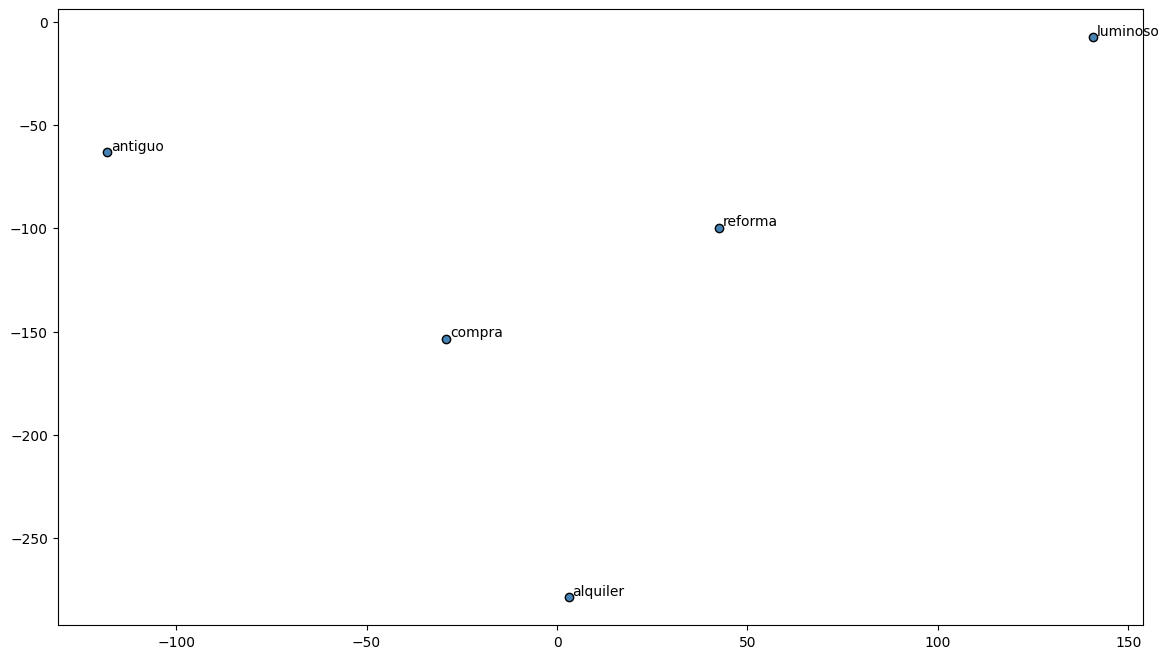

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2, init='random', learning_rate='auto')
np.set_printoptions(suppress=True)
T = tsne.fit_transform(vector_palabras)
labels = palabras
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# PCA porque sí

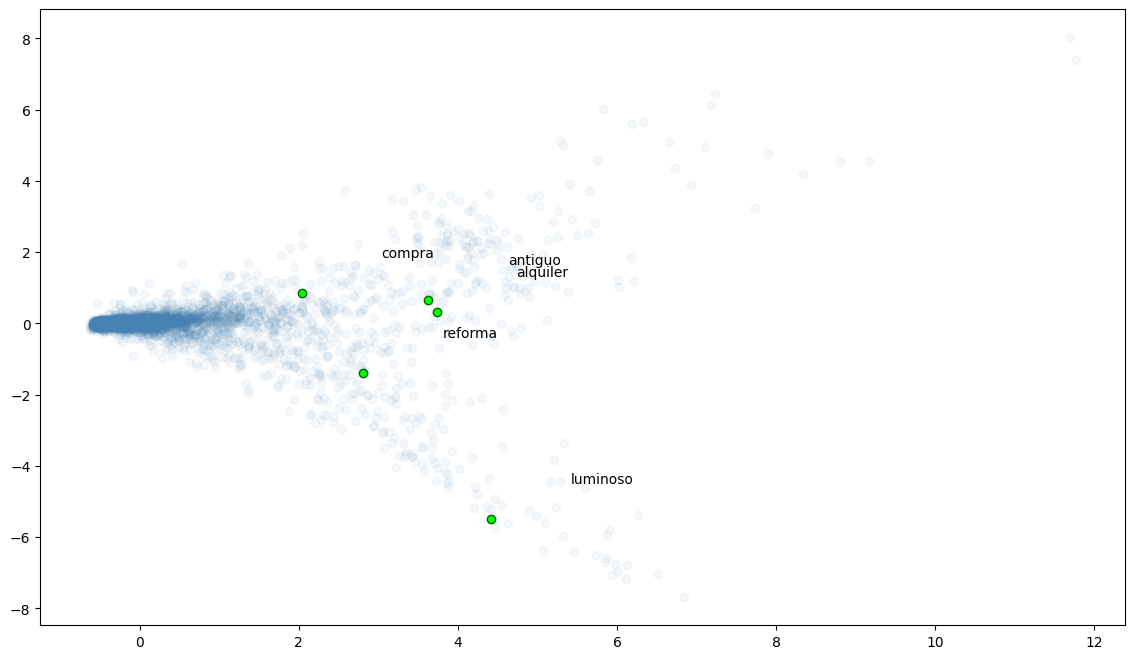

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = palabras
T = pca.transform(vector_palabras)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

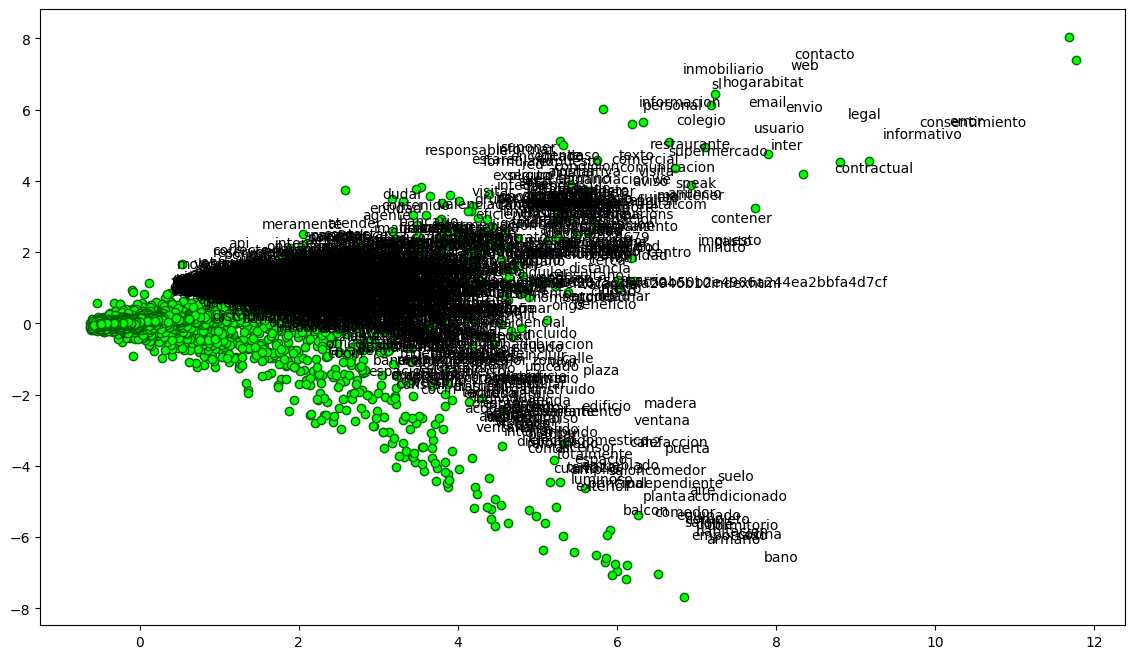

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = vocab
T = pca.transform(word_vectors)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

### BOW

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv = CountVectorizer()
user_desc_bow = cv.fit_transform(user_desc_processed)
desc_bow = cv.transform(df_filtered['Descripcion'])
vocab = cv.get_feature_names_out()

similarity_bow = cosine_similarity(user_desc_bow, desc_bow)

print(vocab)

['1500' 'alquiler' 'amueblado' 'banera' 'bano' 'campanar' 'cocina' 'deber'
 'ducha' 'espacioso' 'euros' 'habitación' 'luminoso' 'mes' 'moderno'
 'piso' 'salon' 'terrazar']


In [22]:
import numpy as np

sorted_indices = np.argsort(similarity_bow[0,:])

filtered_df_bow = df_filtered.iloc[sorted_indices]

print(filtered_df_bow["Descripcion"])

https://www.indomio.es/anuncios/95041839/    habitacion persona precio economico persona 36...
https://www.indomio.es/anuncios/95223135/      rincon acogedor   necesitar espacio   gustar...
https://www.indomio.es/anuncios/95183841/                                                     
https://www.indomio.es/anuncios/95024555/    excavación centro amar vecindario vibrante   g...
https://www.indomio.es/anuncios/94845913/    alquilar departamento amoblado 2 recamara av p...
                                                                   ...                        
https://www.indomio.es/anuncios/94984795/    piso alquiler actualmente oficina estancia ban...
https://www.indomio.es/anuncios/94798533/    estupendo luminoso apartamento exterior situad...
https://www.indomio.es/anuncios/95155457/    engel   volkers presentar luminoso piso estren...
https://www.indomio.es/anuncios/95312521/    000alqaff1150 alquiler vivienda reformado asce...
https://www.indomio.es/anuncios/95066603/    descu

### TFIDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer()
user_desc_tfidf = tv.fit_transform(user_desc_processed)
desc_tfidf = tv.transform(df_filtered['Descripcion'])
vocab = tv.get_feature_names_out()

similarity_tfidf = cosine_similarity(user_desc_tfidf, desc_tfidf)

print(vocab)

['1500' 'alquiler' 'amueblado' 'banera' 'bano' 'campanar' 'cocina' 'deber'
 'ducha' 'espacioso' 'euros' 'habitación' 'luminoso' 'mes' 'moderno'
 'piso' 'salon' 'terrazar']


In [24]:
import numpy as np

sorted_indices = np.argsort(similarity_tfidf[0,:])

filtered_df_tfidf = df_filtered.iloc[sorted_indices]

print(filtered_df_tfidf)

                                                                                 Descripcion  \
https://www.indomio.es/anuncios/95041839/  habitacion persona precio economico persona 36...   
https://www.indomio.es/anuncios/95283809/    juerguista rustico   querer encantado   gust...   
https://www.indomio.es/anuncios/95024555/  excavación centro amar vecindario vibrante   g...   
https://www.indomio.es/anuncios/95048745/                                                      
https://www.indomio.es/anuncios/95315049/  alquilar departamento amoblado 3 recamara av g...   
...                                                                                      ...   
https://www.indomio.es/anuncios/94798533/  estupendo luminoso apartamento exterior situad...   
https://www.indomio.es/anuncios/94984795/  piso alquiler actualmente oficina estancia ban...   
https://www.indomio.es/anuncios/95155457/  engel   volkers presentar luminoso piso estren...   
https://www.indomio.es/anuncios/95312521

# MODELOS PREENTRENADOS DE GENSIM

FAST-TEXT

In [25]:
# Utilizar los modelos preentrenados por defecto para obtener vectores de palabras

from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'wiki.es.vec'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

FileNotFoundError: [Errno 2] No such file or directory: 'wiki.es.vec'

In [ ]:
wordvectors.most_similar('aire', topn=10)

[('ventilado', 0.5678027272224426),
 ('ventilador', 0.5580487847328186),
 ('aireación', 0.5503548979759216),
 ('acondicionado', 0.5393435955047607),
 ('ventilados', 0.5237477421760559),
 ('calor', 0.5226181745529175),
 ('ventiladores', 0.5222494006156921),
 ('evaporador', 0.5198239684104919),
 ('ventilación', 0.5196513533592224),
 ('respira', 0.5168545842170715)]

In [ ]:
# Find similar words
wordvectors.most_similar('piso', topn=10)


[('pisos', 0.7321085929870605),
 ('entrepiso', 0.6684436798095703),
 ('sótano', 0.6520259976387024),
 ('entresuelo', 0.6420222520828247),
 ('techo', 0.6313766241073608),
 ('buhardilla', 0.627623438835144),
 ('azotea', 0.6233482956886292),
 ('semisótano', 0.6179214119911194),
 ('escaleras', 0.6076043844223022),
 ('terraza', 0.600856363773346)]

In [ ]:
import numpy as np
palabras = ["alquiler", "compra", "luminoso", "reforma", "antiguo","nuevo","iluminado","alquilado","remodelación","baño", "vater", "bañera", "horno", "cocina","comedor","television","lavadora" ]
alquiler, compra, luminoso, reforma, antiguo,nuevo,iluminado,alquilado,remodelación = wordvectors["alquiler"], wordvectors["compra"], wordvectors["luminoso"], wordvectors["reforma"], wordvectors["antiguo"], wordvectors["nuevo"], wordvectors["iluminado"], wordvectors["alquilado"], wordvectors["remodelación"]
vector_palabras = np.array([alquiler, compra, luminoso, reforma, antiguo,nuevo,iluminado,alquilado,remodelación])

In [ ]:
baño, vater, bañera, horno, cocina,comedor,television,lavadora= wordvectors["baño"], wordvectors["vater"], wordvectors["bañera"], wordvectors["horno"], wordvectors["cocina"], wordvectors["comedor"], wordvectors["television"], wordvectors["lavadora"]
vector_palabras_2 = np.array([baño, vater, bañera, horno, cocina,comedor,television,lavadora])
#concatenamos los dos vectores
vector_palabras = np.concatenate((vector_palabras, vector_palabras_2), axis=0)


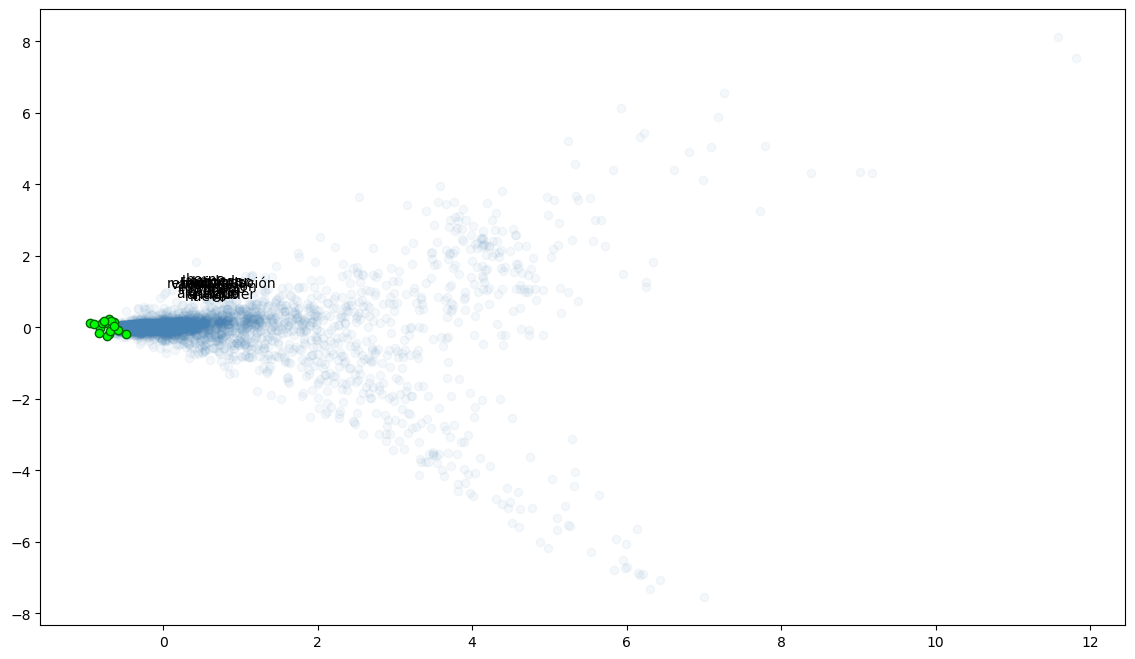

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = palabras
T = pca.transform(vector_palabras)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

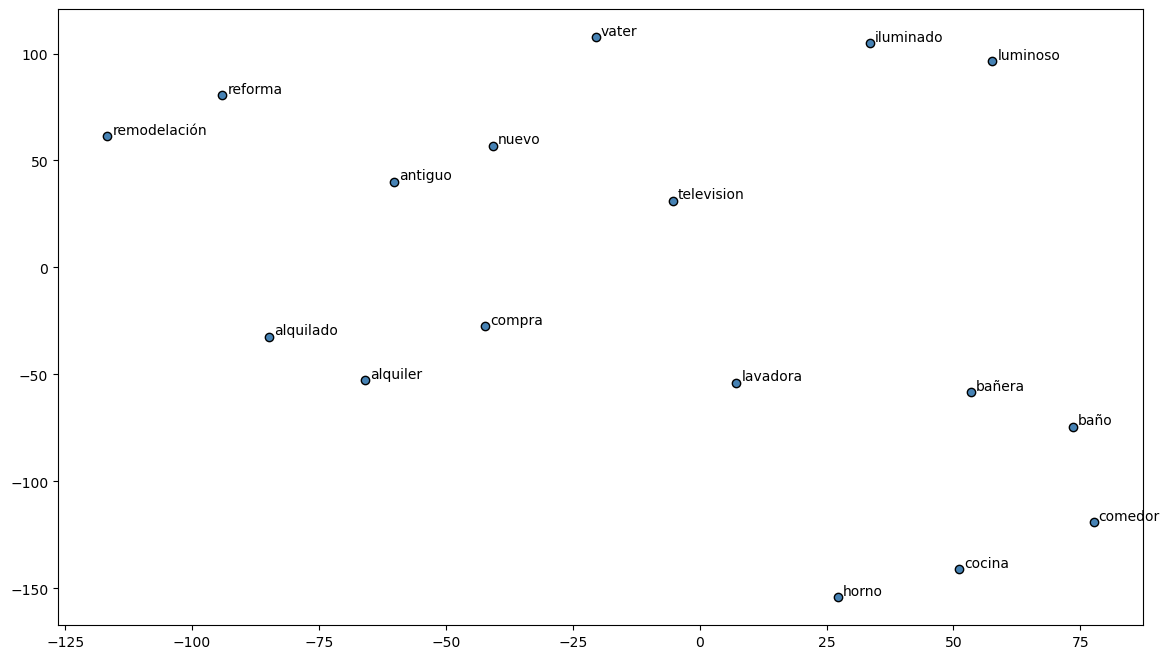

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=5, init='pca', learning_rate='auto')
np.set_printoptions(suppress=True)
T = tsne.fit_transform(vector_palabras)
labels = palabras
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

Observamos que la separación entre palabras es muy buena, es capaz de distinguir y clusterizar de forma bastante correcta, al tener muchas palabras para entrenar

word2vec

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
wordvectors_file_vec = 'SBW-vectors-300-min5.txt'
cantidad = 100000
wordvectors = KeyedVectors.load_word2vec_format(wordvectors_file_vec, limit=cantidad)

In [ ]:
wordvectors.most_similar('aire', topn=10)

[('acondicionado', 0.6124901175498962),
 ('ventilador', 0.599229097366333),
 ('respirar', 0.5681887269020081),
 ('calor', 0.5656431913375854),
 ('respiramos', 0.5655885934829712),
 ('bocanada', 0.5642524361610413),
 ('ventiladores', 0.5511625409126282),
 ('chorro', 0.5507266521453857),
 ('respirando', 0.5479852557182312),
 ('humo', 0.5473110675811768)]

In [ ]:
wordvectors.most_similar('piso', topn=10)

[('pisos', 0.7260064482688904),
 ('entresuelo', 0.7052725553512573),
 ('azotea', 0.6873992085456848),
 ('sótano', 0.6595461368560791),
 ('patio', 0.648383378982544),
 ('rellano', 0.6473751664161682),
 ('terraza', 0.6382343769073486),
 ('escaleras', 0.6342664361000061),
 ('ascensor', 0.6341277956962585),
 ('edificio', 0.6316542625427246)]

In [ ]:
import numpy as np
palabras = ["alquiler", "compra", "luminoso", "reforma", "antiguo","nuevo","iluminado","alquilado","remodelación","baño", "inodoro", "bañera", "horno", "cocina","comedor","television","lavadora" ]
alquiler, compra, luminoso, reforma, antiguo,nuevo,iluminado,alquilado,remodelación = wordvectors["alquiler"], wordvectors["compra"], wordvectors["luminoso"], wordvectors["reforma"], wordvectors["antiguo"], wordvectors["nuevo"], wordvectors["iluminado"], wordvectors["alquilado"], wordvectors["remodelación"]
vector_palabras = np.array([alquiler, compra, luminoso, reforma, antiguo,nuevo,iluminado,alquilado,remodelación])

In [ ]:
baño, inodoro, bañera, horno, cocina,comedor,television,lavadora= wordvectors["baño"], wordvectors["inodoro"], wordvectors["bañera"], wordvectors["horno"], wordvectors["cocina"], wordvectors["comedor"], wordvectors["television"], wordvectors["lavadora"]
vector_palabras_2 = np.array([baño, vater, bañera, horno, cocina,comedor,television,lavadora])
#concatenamos los dos vectores
vector_palabras = np.concatenate((vector_palabras, vector_palabras_2), axis=0)

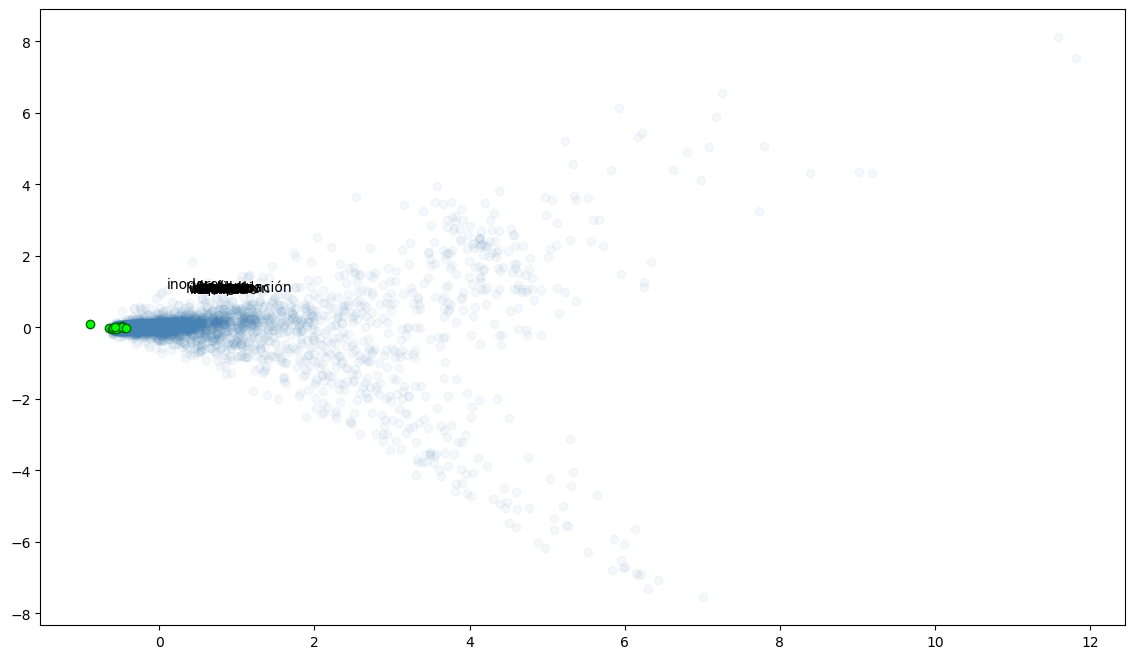

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
np.set_printoptions(suppress=True)
T = pca.fit_transform(word_vectors)

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue',alpha=0.05)

labels = palabras
T = pca.transform(vector_palabras)
plt.scatter(T[:, 0], T[:, 1], c='lime', edgecolors='darkgreen')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

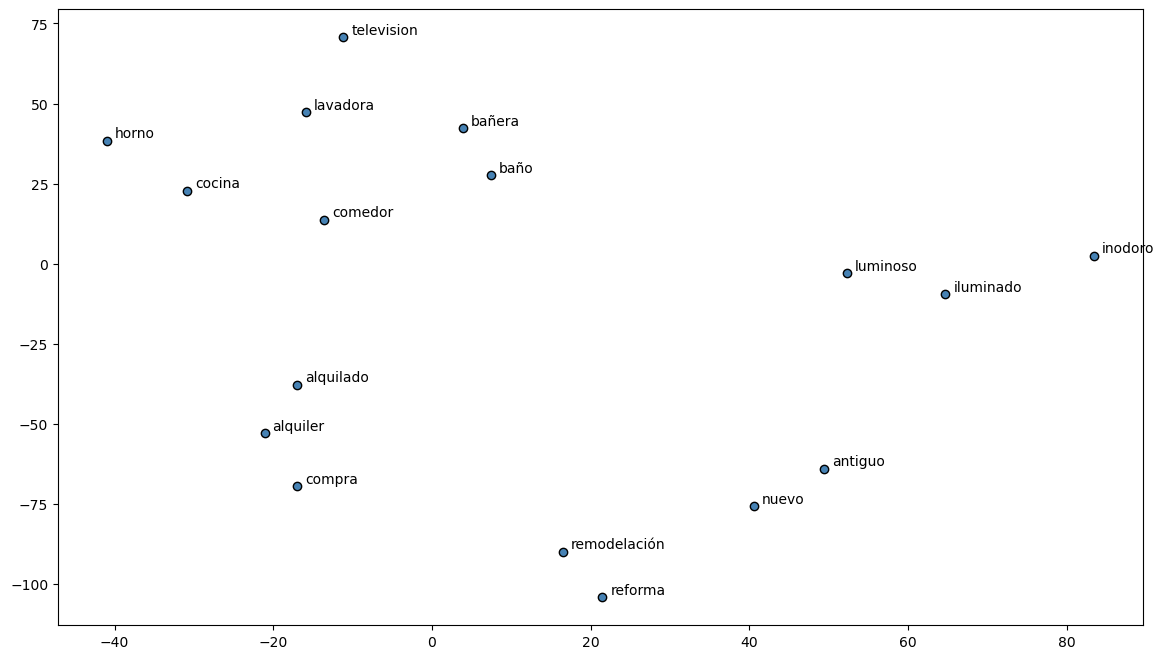

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=5, init='pca', learning_rate='auto')
np.set_printoptions(suppress=True)
T = tsne.fit_transform(vector_palabras)
labels = palabras
plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

excepto inodoro, el resto de palabras del embedding es muy similar a fasttext, en principio por la compejidad del castellano, se debería preferir fasttext a word2vec, sin embargo no se aprecian grandes diferencias

GloVE

NO ENCUENTRO EMBEDDINGS DE GLOVE EN ESPAÑOL, SIN EMBARGO AL QUERER COMPARAR DOC CON DOC EN NUESTRO PROYECTO TIENE MAS SENTIDO QUE LOS METODOS ANTERIORES